# Combine different files:

In [22]:
with open('log.csv', 'r') as f1:
    f1_content = f1.read()

with open('log.csv', 'r') as f2:
    f2_content = f2.read()

with open('combine.csv', 'a') as res:
    res.write(f1_content)
    res.write(f2_content)

# Read data

In [18]:
import csv
import matplotlib.pyplot as plt

pdoa_data = []
tdoa_data = []
rx_true_r = []

dist_meas = []
twr_count = []
dist_true_r = []

with open("log.csv", "r") as f:
    reader = csv.reader(f)
    for i, line in enumerate(reader):
        linetype = int(line[0])
        if (linetype == 0):
            # rx data, featuring pdoa, tdoa and distance
            pdoa_data += [float(line[1])]
            tdoa_data += [int(line[2])]
            rx_true_r += [int(line[3])]
        
        if (linetype == 1):
            dist_meas += [int(line[5])]
            twr_count += [int(line[6])]
            dist_true_r += [int(line[7])]

        if (linetype == 2):
            print("CIR data")

# Plot data

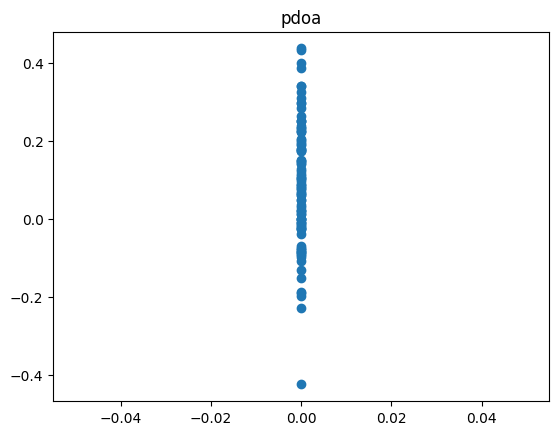

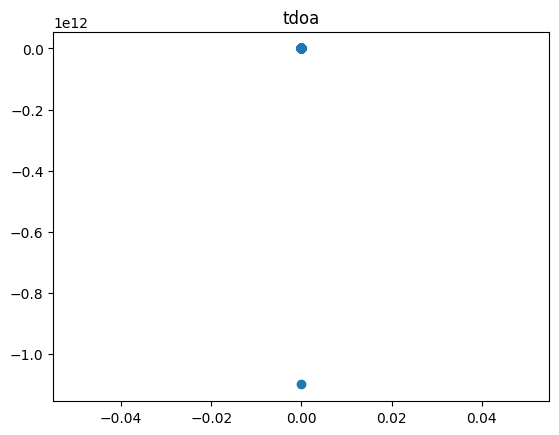

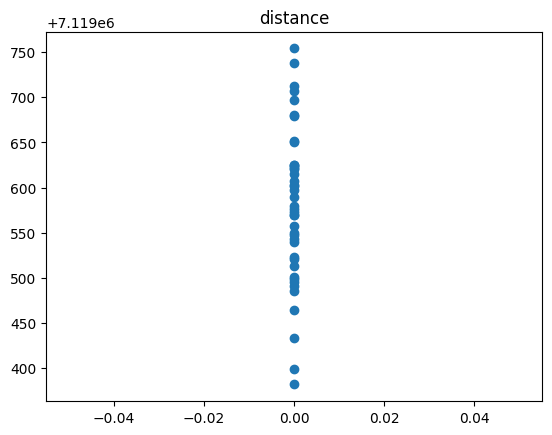

In [19]:
plt.figure()
plt.title("pdoa")
plt.scatter(rx_true_r, pdoa_data)

plt.figure()
plt.title("tdoa")
plt.scatter(rx_true_r, tdoa_data)

plt.figure()
plt.title("distance")
plt.scatter(dist_true_r, dist_meas)